In [122]:
import pandas as pd

land_temp = pd.read_csv('../data/land_temp.csv')

In [123]:
land_temp.drop('Unnamed: 0', axis=1, inplace=True)

In [124]:
land_temp.rename(columns={'Monthly':'monthlyanamoly', 'Monthly.1':'monthlyunc','Annual':'annualanamoly','Annual.1':
                         'annualunc','Five-year':'fiveyearanamoly','Five-year.1':'fiveyearunc','Ten-year':'tenyearanamoly',
                         'Ten-year.1':'tenyearunc','Twenty-year':'twentyyearanamoly','Twenty-year.1':'twentyyearunc'},inplace=True)
land_temp.drop(0, axis=0,inplace=True)

In [125]:
land_temp['Month'] =land_temp['Month'].apply(lambda X:int(X))
land_temp['Year'] =land_temp['Year'].apply(lambda X:int(X))

In [128]:
land_temp.to_csv("../data/cleaned_temp.csv")

In [8]:
land_temp['monthlyanamoly'] = land_temp['monthlyanamoly'].apply(lambda x: float(x))
land_temp['annualanamoly'] = land_temp['annualanamoly'].apply(lambda x: float(x))

In [64]:
import os
import matplotlib.pyplot as plt

parent_dir = ".."
part = "Global_temperature"
path_id = os.path.join(parent_dir,"plots",part)
os.makedirs(path_id)

In [65]:
def save_plot(plot_name,plot_extension="png",resolution=100,tight_layout=True):

    plot_path = os.path.join(path_id,plot_name+'.'+plot_extension)
    plt.savefig(plot_path,dpi=resolution,format=plot_extension)

    print(f"{plot_name} saved to plots.")

land_temp_between_1750_2022 saved to plots.


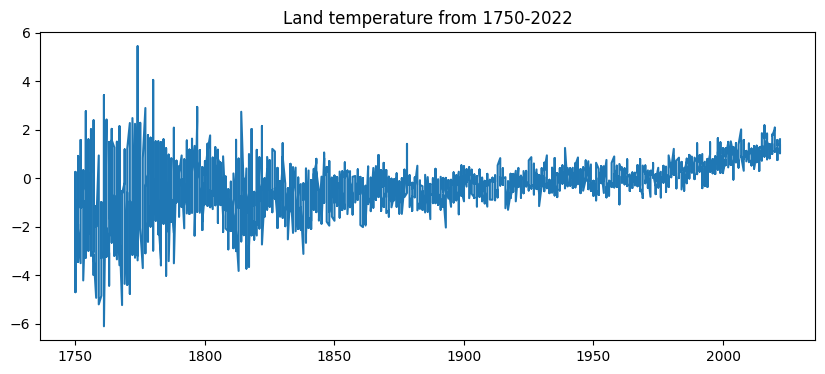

In [66]:
import matplotlib.pyplot as plt
import helper_functions

plt.figure(figsize=(10,4))
plt.plot(land_temp['Year'],land_temp['monthlyanamoly'])
plt.title("Land temperature from 1750-2022")
save_plot("land_temp_between_1750_2022")
plt.show()

In [68]:
#creating years between 1930-present

new_land_temp_index =  land_temp.loc[land_temp['Year'] == 1930].index.values[0]
new_land_temp = land_temp.loc[new_land_temp_index:].copy()
new_land_temp.reset_index(drop=True,inplace=True)

In [129]:
new_land_temp

,Year,Month,monthlyanamoly,monthlyunc,annualanamoly,annualunc,fiveyearanamoly,fiveyearunc,tenyearanamoly,tenyearunc,twentyyearanamoly,twentyyearunc
0,1930,1,-0.290,0.193,-0.216,0.105,-0.097,0.086,-0.113,0.09,-0.104,0.077
1,1930,2,-0.131,0.242,-0.194,0.106,-0.096,0.088,-0.102,0.09,-0.101,0.076
2,1930,3,0.185,0.198,-0.191,0.107,-0.095,0.089,-0.1,0.09,-0.101,0.076
3,1930,4,-0.222,0.275,-0.207,0.111,-0.099,0.088,-0.106,0.09,-0.1,0.076
4,1930,5,-0.334,0.291,-0.171,0.115,-0.107,0.089,-0.108,0.09,-0.099,0.076
...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2022,6,1.312,0.055,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110,2022,7,1.278,0.068,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1111,2022,8,1.230,0.111,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1112,2022,9,1.111,0.078,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


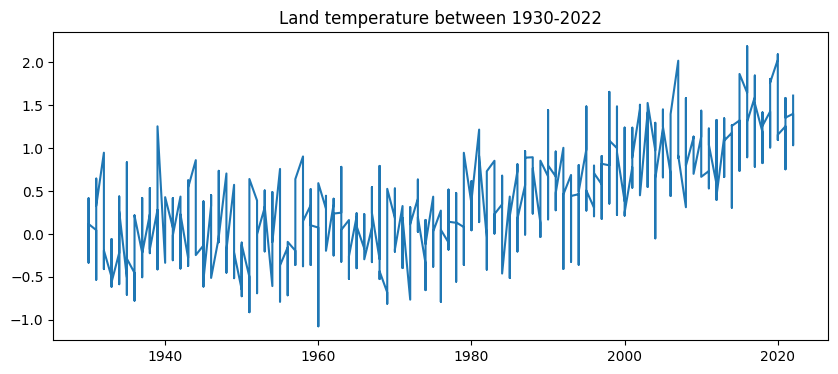

In [70]:
plt.figure(figsize=(10,4))
plt.plot(new_land_temp['Year'],new_land_temp['monthlyanamoly'])
plt.title("Land temperature between 1930-2022")
plt.show()

In [72]:
till_2015 = new_land_temp.loc[new_land_temp['Year'] == 2015].index[0]

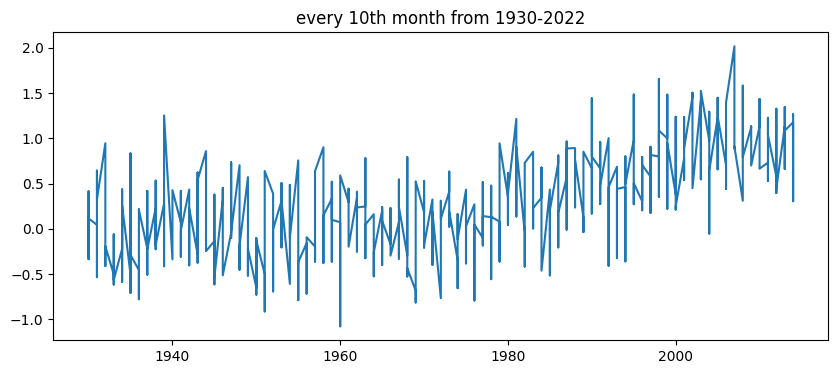

In [73]:
plt.figure(figsize=(10,4))
plt.plot(new_land_temp['Year'][:till_2015],new_land_temp['monthlyanamoly'][:till_2015])
plt.title("every 10th month from 1930-2022")
plt.show()

In [74]:
#dataframe till 2015
df2015 = new_land_temp.loc[:, ('Year','monthlyanamoly')][:till_2015]

In [75]:
#between 1960-2022
year_1960 = df2015.loc[df2015['Year']==1960].index[0]

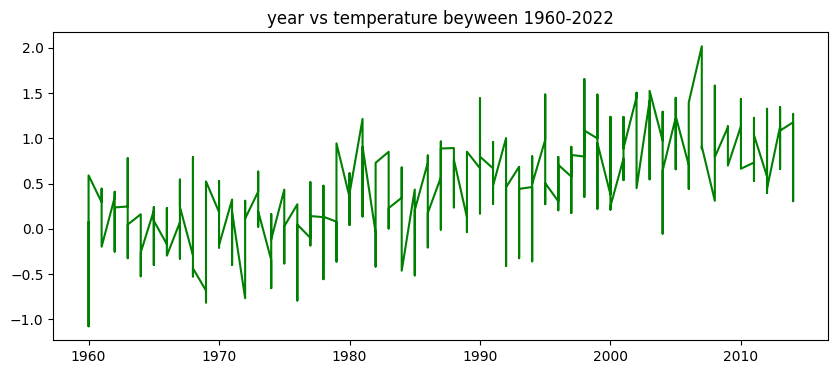

In [76]:
plt.figure(figsize=(10,4))
plt.plot(df2015['Year'][year_1960:], df2015['monthlyanamoly'][year_1960:],"g")
plt.title("year vs temperature beyween 1960-2022")
plt.show()

In [77]:
import warnings
warnings.filterwarnings(action='ignore')

#preparing the average temperature over a year
i=0
increment=12
avg_temp = []
for year in range(272):
    avg_temp.append(land_temp['monthlyanamoly'][i:increment].mean())
    i=i+12
    increment=increment+12
avg_temp.append(land_temp['monthlyanamoly'][increment-12:].mean())

avg_temp_df = pd.DataFrame(data=avg_temp, columns=['avg_temp'],index=[year for year in range(1750,2023)])
avg_temp_df.reset_index(inplace=True)
avg_temp_df.rename(columns={'index':'year'},inplace=True)

average_temperature_over_the_year saved to plots.


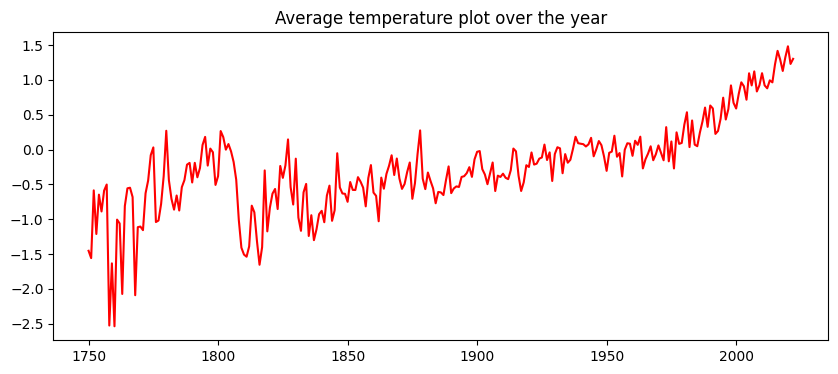

In [78]:
#plotting average temperature

plt.figure(figsize=(10,4))
plt.plot(avg_temp_df['year'],avg_temp_df['avg_temp'],"r")
plt.title("Average temperature plot over the year")
save_plot("average_temperature_over_the_year")
plt.show()

In [80]:
#fetching only required columns
data = df2015.loc[:, ('Year','monthlyanamoly')]

Autocorrelation_of_global_temp_lags saved to plots.


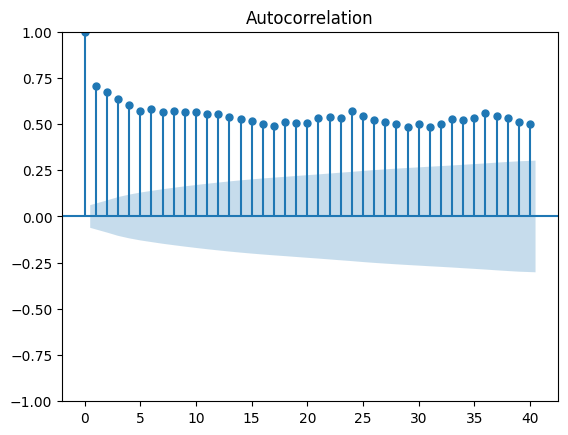

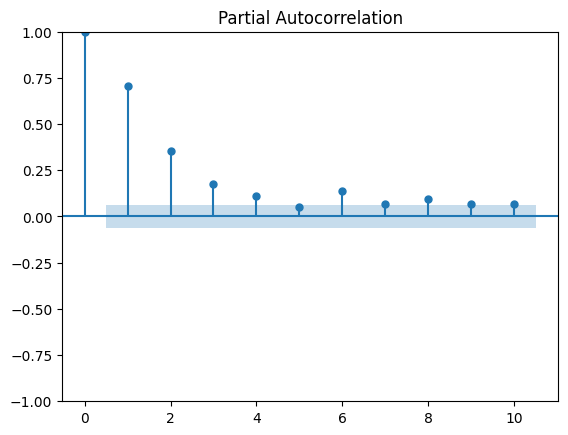

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_a =plot_acf(data['monthlyanamoly'],lags=40)
save_plot("Autocorrelation_of_global_temp_lags")
plot_p = plot_pacf(data['monthlyanamoly'],lags=10)

In [83]:
#adfuller test to see whether the data is stationary or not
from statsmodels.tsa.stattools import adfuller

adfuller(avg_temp_df['avg_temp'])

(-1.0179186836395773,
 0.7466729005655285,
 11,
 261,
 {'1%': -3.4556556713934934,
  '5%': -2.872678352489859,
  '10%': -2.57270548832225},
 77.60419471049102)

In [84]:
#decomposition of time series
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal = seasonal_decompose(avg_temp_df['avg_temp'],model='additive',period=1)

data_components saved to plots.


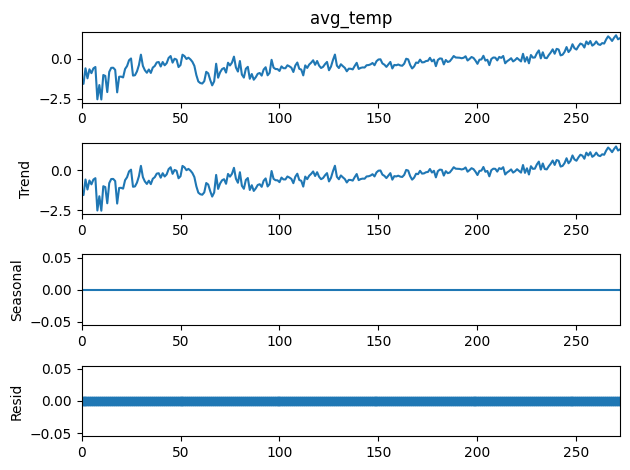

In [87]:
s_plot =seasonal.plot()
save_plot("data_components")

impact-response-plot saved to plots.


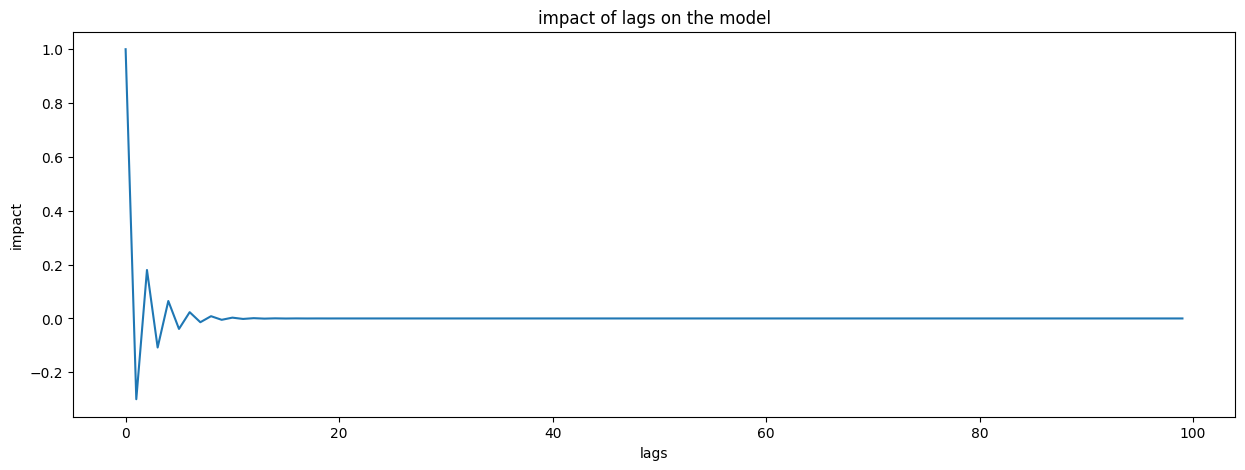

In [88]:
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process
import numpy as np

ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
plt.figure(figsize=(15,5))
plt.plot(arima_process.arma_impulse_response(ar, ma))
plt.xlabel("lags")
plt.ylabel("impact")
plt.title("impact of lags on the model")
save_plot("impact-response-plot")
plt.show()

In [89]:
avg_data_index = avg_temp_df.loc[avg_temp_df['year'] == 1950].index[0]
data = avg_temp_df[:][avg_data_index:]
data.reset_index(drop=True, inplace=True)

train_index = data.loc[data['year'] == 2019].index[0]

In [90]:
train_data = data.loc[:][:train_index]
test_data = data.loc[:][train_index-1:]

quantile-quantile_plot saved to plots.


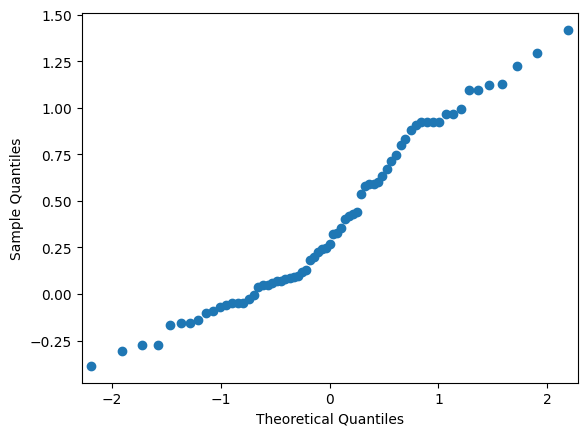

In [91]:
from statsmodels.graphics.gofplots import qqplot

plt = qqplot(train_data['avg_temp'])
save_plot("quantile-quantile_plot")

In [119]:
def model_arima(p,d,q,y_train,y_future,df_train,df_test):

    from sktime.forecasting.arima import ARIMA
    import warnings
    import matplotlib.pyplot as plt

    warnings.filterwarnings(action='ignore')

    current_values = y_train
    future_values = y_future

    #for data
    model = ARIMA((p,d,q))
    model.fit(y_train)

    predictions = model.predict(fh=np.arange(-68,0))
    future_not_residual = model.predict(fh=[-2,-1,0,1,2,3,4,5,6])
    print(future_not_residual.values)

    #for residuals model-2

    model2 = ARIMA(order=(1,1,0))
    residuals = (y_train- predictions)
    model2.fit(residuals)

    predicted_residuals = model2.predict(fh=np.arange(-68,0))
    future_residual = model2.predict(fh=[-2,-1,0,1,2,3,4,5,6])

    predicted_values = predictions + predicted_residuals 
    future_predictions =  future_not_residual + future_residual 

    difference = abs(y_train - predicted_values.shift(-1))
    future_difference = abs(future_values - future_predictions)

    print(difference.sum()/len(difference))
    print(future_difference.sum()/len(future_difference))
    #print("improved")
    #print(future_values-future_predictions.shift(1))

    plt.figure(figsize=(10,4))

    #current predictions
    plt.plot(df_train.index, current_values, 'k-',label='acutal values')
    plt.plot(predicted_values.shift(-1),'g--',label='predicted values')

    #future predictions
    plt.plot(df_test.index,future_values,'purple',label='future points')
    plt.plot(future_predictions.shift(1),'blue',label="future predictions")
    #plt.plot(df['Coverage'][0.9]['lower'],'green',label='lower')
    #plt.plot(df['Coverage'][0.9]['upper'],'brown',label='upper')
    plt.legend(loc='upper left')
    
    return plt, model.summary,model2.summary

[1.12416475 1.35069549 1.38708906 1.24271588 1.21664556 1.26108112
 1.27003926 1.29684907 1.31467621]
0.11798349977095719
0.07715710763844852
ARIMA_model_on_train_vs_test saved to plots.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   69
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -18.582
Date:                Tue, 10 Jan 2023   AIC                             43.164
Time:                        11:36:37   BIC                             49.823
Sample:                             0   HQIC                            45.803
                                 - 69                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0034      0.035     -0.095      0.924      -0.073       0.066
ar.L1         -0.4242      0.142     -2.992      0.003      -0.702      -0.146
sigma2         0.0809      0.018      4.505      0.000       0.046       0.116
===================================================================================
Ljung-Box (L1) (Q):                   2.95   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.09   Prob(JB):                         0.48
Heteroskedasticity (H):               1.05   Skew:                            -0.14
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

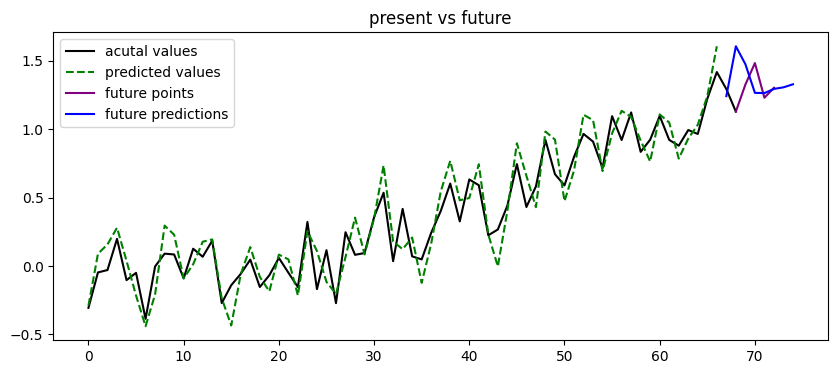

In [120]:
plt,summary1,summary2 = model_arima(1,1,0, y_train=train_data['avg_temp'],y_future=test_data['avg_temp'],df_train=train_data,df_test=test_data)
plt.title("present vs future")
save_plot("ARIMA_model_on_train_vs_test")
summary2()

In [94]:
train_data2 =  data.loc[:train_index+2]
test_data2= data.loc[train_index+2:]

0.1164919673943653
0.03831603523815584
ARIMA_model_with_latest_data saved to plots.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 1, 1)   Log Likelihood                   0.524
Date:                Tue, 10 Jan 2023   AIC                              6.952
Time:                        10:49:18   BIC                             16.003
Sample:                             0   HQIC                            10.551
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      0.892      0.372      -0.001       0.004
ar.L1         -0.1450      0.149     -0.970      0.332      -0.438       0.148
ma.L1         -0.9994      9.691     -0.103      0.918     -19.993      17.995
sigma2         0.0427      0.414      0.103      0.918      -0.769       0.854
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.68   Prob(JB):                         0.40
Heteroskedasticity (H):               0.91   Skew:                            -0.03
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

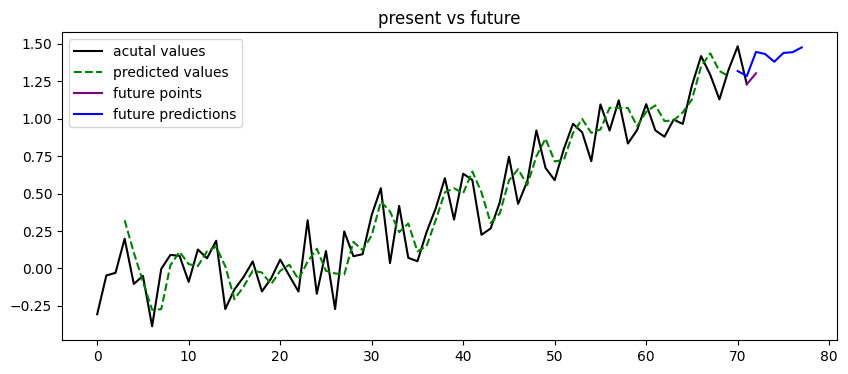

In [95]:
plt,summary1,summary2 = model_arima(1,1,0, y_train=train_data2['avg_temp'],y_future=test_data2['avg_temp'],df_train=train_data2,df_test=test_data2)
plt.title("present vs future")
save_plot("ARIMA_model_with_latest_data")
summary2()